In [30]:
# pacote de processamento dos dados
import pandas as pd

# pacote de visualização de dados
import matplotlib.pyplot as plt

In [31]:
# leitura do arquivo
df_inc = pd.read_csv("fires.csv",sep=';')
df_ind = pd.read_csv("dataset_indigenas.csv",sep=';',encoding='ISO-8859-1', decimal=',')



In [32]:
# imprime as 3 primeiras linhas
df_inc.head(3)

,date,class,focuses,uf
0,2019/09,Desmatamento Consolidado,24,TOCANTINS
1,2020/10,Desmatamento Recente,1,TOCANTINS
2,2021/10,Desmatamento Consolidado,49,TOCANTINS


In [33]:
# imprime as 3 primeiras linhas


,ANO,TRIBO,AREA
0,2022,Jarawara/Jamamadi/Kanamati,0.07
1,2022,Kaxarari,1.09
2,2022,Barreira da Missï¿½o,0.00


In [34]:
#Mudando o nome da coluna "class" da base de dados dos desmatamentos para outro nome, pois "class" é uma palavra reservada do python e para poder evitar qualquer tipo de erro
df_inc.rename(columns={'class': 'Classe'}, inplace=True)

In [35]:
#Mudando o nome da coluna "AREA KM²" da base de dados dos desmatamentos para outro nome, pois "AREA KM²" é uma palavra que poderia dar problema no entendimento da lingaguem


In [36]:
df_inc.sample(3)

,date,Classe,focuses,uf
1337,2020/08,Outros,114,AMAZONAS
1241,2020/03,Desmatamento Consolidado,26,AMAZONAS
537,2022/08,Desmatamento Consolidado,2815,PARÁ


In [37]:
df_inc["Classe"].value_counts()

Classe
Desmatamento Consolidado    356
Desmatamento Recente        328
Vegetacao Secundaria        313
Outros                      297
Floresta                    295
Name: count, dtype: int64

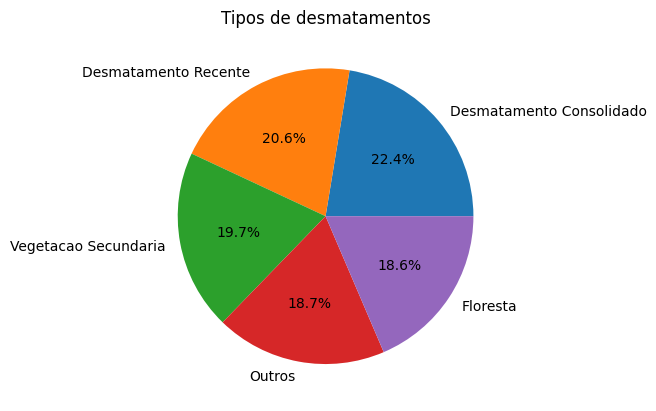

In [38]:
# Colocando os dados em lugares certos
val = df_inc["Classe"].value_counts()
X = [key for key in val.keys()]
Y = [val[key] for key in val.keys()]
# Grafico de pizza sobre os "Tipos de desmatamentos"
plt.title("Tipos de desmatamentos")
plt.pie(Y, labels=X, autopct='%1.1f%%')
plt.show()

In [39]:
df_inc["uf"].value_counts()

uf
MATO GROSSO    220
PARÁ           217
AMAZONAS       208
RONDÔNIA       199
RORAIMA        186
MARANHÃO       180
TOCANTINS      131
ACRE           130
AMAPÁ          118
Name: count, dtype: int64

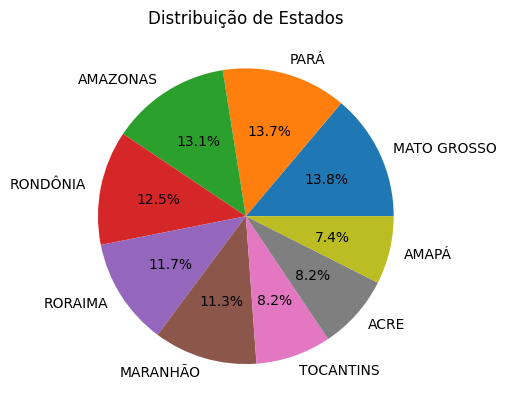

In [40]:
# Colocando os dados em lugares certos
val = df_inc["uf"].value_counts()
X = [key for key in val.keys()]
Y = [val[key] for key in val.keys()]
# Grafico de pizza sobre a "Distribuição de Estados"
plt.title("Distribuição de Estados")
plt.pie(Y, labels=X, autopct='%1.1f%%')
plt.show()

In [41]:
#Imprimindo 3 linhas aleatorias da base de dados das terra destruidas indigenas


,ANO,TRIBO,AREA
380,2022,Seruini/Mariene,0.64
310,2022,Vui-Uata-In,0.07
905,2020,Rio Paru DEste,0.00


,ANO,TRIBO,AREA
0,2022,Jarawara/Jamamadi/Kanamati,0.07
1,2022,Kaxarari,1.09
2,2022,Barreira da Missï¿½o,0.00


In [43]:
# Agora vamos saber a soma de totas as area indigenas que foram desmatadas por ano
soma_2019 = df_ind.loc[df_ind['ANO'] == 2019, 'AREA'].sum()
soma_2020 = df_ind.loc[df_ind['ANO'] == 2020, 'AREA'].sum()
soma_2021 = df_ind.loc[df_ind['ANO'] == 2021, 'AREA'].sum()
soma_2022 = df_ind.loc[df_ind['ANO'] == 2022, 'AREA'].sum()
print(f"Area Perdida:\n2019: {soma_2019:.2f}\n2020: {soma_2020:.2f}\n2021: {soma_2021:.2f}\n2022: {soma_2022:.2f}\n")

Area Perdida:
2019: 498.58
2020: 429.13
2021: 364.96
2022: 330.40



In [44]:
# Agora vamos entender quais anos tiveram mais desmatamentos
df_inc["date"].value_counts()

date
2022/10    44
2022/11    44
2020/09    44
2019/09    43
2020/10    43
2020/08    43
2019/11    43
2020/11    43
2021/11    43
2019/10    43
2022/08    43
2022/09    43
2021/10    42
2021/09    42
2021/08    41
2023/01    41
2022/12    40
2020/12    40
2019/08    39
2020/07    38
2019/12    38
2022/07    38
2021/06    37
2022/01    36
2020/06    36
2022/06    35
2021/07    35
2021/12    35
2022/05    34
2020/01    32
2020/05    31
2023/02    31
2021/05    31
2021/03    30
2023/03    30
2021/01    30
2022/02    29
2020/03    28
2020/02    28
2021/04    27
2021/02    26
2022/04    24
2020/04    23
2022/03    23
Name: count, dtype: int64

In [45]:
# Dito isso vamos agrupar as datas em anos para ficar mais facil
df_inc["date"] = df_inc["date"].str.split('/').str[0].astype(int)
# Agora todas as datas estao resumidas ao ano e não mais a meses e ano

In [46]:
# Agora vamos entender quais anos tiveram mais desmatamentos
df_inc["date"].value_counts()

date
2022    433
2020    429
2021    419
2019    206
2023    102
Name: count, dtype: int64

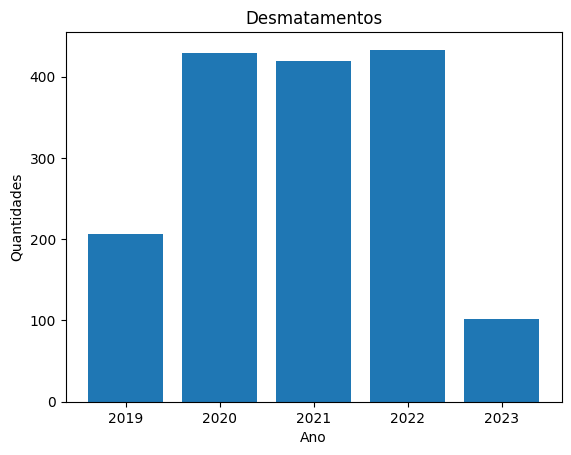

In [47]:
# Criaremos um grafico para mostrar a quantidade de desmatamentos por ano
val = df_inc["date"].value_counts()
X = [float(key) for key in val.keys()]
Y = [val[key] for key in val.keys()]
# plot - gráfico de barras
plt.bar(X, Y)
plt.title("Desmatamentos")
plt.xlabel('Ano')
plt.ylabel('Quantidades')
plt.show()

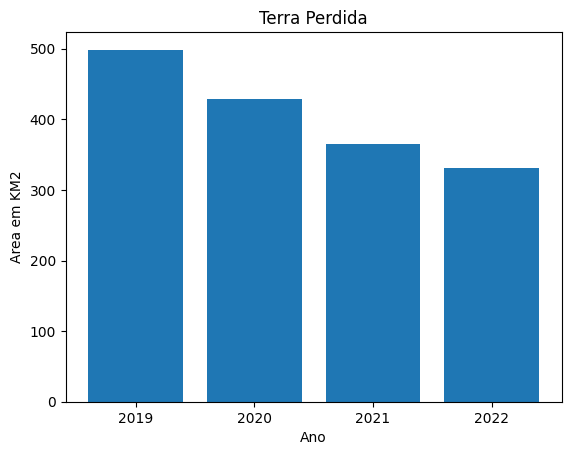

In [48]:
# Criaremos um grafico para mostrar a quantidade de terras indigenas sao perdidas por ano
X = ["2019", "2020", "2021", "2022"]
Y = [498.58,429.13,364.96,330.40]
# plot - gráfico de barras
plt.bar(X, Y)
plt.title("Terra Perdida")
plt.xlabel('Ano')
plt.ylabel('Area em KM2')
plt.show()

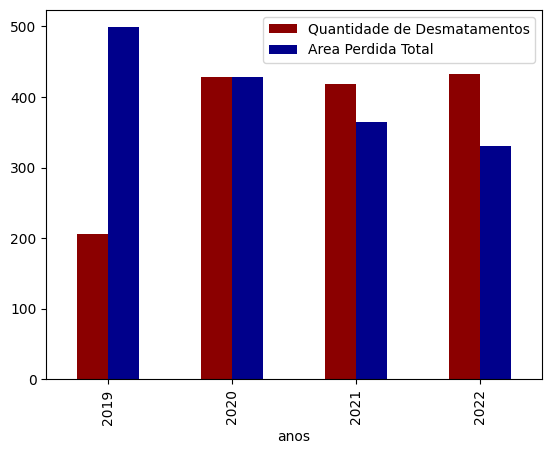

In [49]:
# Agora com esses dados mais faceis podemos gerar graficos mais interresantes e faceis de comparar
# Para isso criaremos uma pequena base para facilitar a comparação dos dados

df_comparacao = pd.DataFrame({
    "anos": ["2019", "2020", "2021", "2022"],
    "Quantidade de Desmatamentos": [206,429,419,433],
    "Area Perdida Total": [498.58,429.13,364.96,330.40]
})

# Criando o gráfico
ax = df_comparacao.plot(x="anos", y=["Quantidade de Desmatamentos", "Area Perdida Total"], kind="bar",color=["darkred","darkblue"])
plt.show()